In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("/Users/gillianmondero/Downloads/Product_Offering_Data.csv")

# Check dataset structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 852.0+ bytes
None
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan  

In [106]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 Product_ID              0
Product_Name            0
Product_Type            0
Risk_Level              0
Target_Age_Group       10
Target_Income_Group     0
dtype: int64


In [108]:
# One-hot encode categorical variables
categorical_columns = ['Product_Type', 'Risk_Level', 'Target_Income_Group']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print (df)

   Product_ID                   Product_Name  Target_Age_Group  \
0           1           Platinum Credit Card               NaN   
1           2           Gold Savings Account               NaN   
2           3  High-Yield Investment Account               NaN   
3           4                  Mortgage Loan               NaN   
4           5                      Auto Loan               NaN   
5           6                  Personal Loan               NaN   
6           7          Youth Savings Account               NaN   
7           8     Retirement Investment Fund               NaN   
8           9                  Business Loan               NaN   
9          10             Travel Credit Card               NaN   

   Product_Type_Investment  Product_Type_Loan  Product_Type_Savings Account  \
0                    False              False                         False   
1                    False              False                          True   
2                     True          

In [112]:
# Infer missing Target_Age_Group based on Risk Level
def infer_age_group(row):
    if row.get('Risk_Level_Low', 0) == 1:
        return np.random.uniform(18, 30)
    elif row.get('Risk_Level_Medium', 0) == 1:
        return np.random.uniform(30, 50)
    else:
        return np.random.uniform(50, 65)

df['Target_Age_Group'] = df.apply(infer_age_group, axis=1).round(2)
# Create Product_Category
df['Product_Category'] = df[[col for col in df.columns if col.startswith("Product_Type_")]].idxmax(axis=1)
df['Product_Category'] = df['Product_Category'].str.replace('Product_Type_', '')
df. head (20)

,Product_ID,Product_Name,Target_Age_Group,Product_Type_Investment,Product_Type_Loan,Product_Type_Savings Account,Risk_Level_Low,Risk_Level_Medium,Target_Income_Group_Low,Target_Income_Group_Medium
0,1,Platinum Credit Card,30.33,False,False,False,False,True,False,True
1,2,Gold Savings Account,24.42,False,False,True,True,False,True,False
2,3,High-Yield Investment Account,58.83,True,False,False,False,False,False,False
3,4,Mortgage Loan,42.68,False,True,False,False,True,False,False
4,5,Auto Loan,42.16,False,True,False,False,True,False,True
5,6,Personal Loan,43.77,False,True,False,False,True,True,False
6,7,Youth Savings Account,19.24,False,False,True,True,False,True,False
7,8,Retirement Investment Fund,61.04,True,False,False,False,False,False,False
8,9,Business Loan,45.30,False,True,False,False,True,False,True
9,10,Travel Credit Card,49.33,False,False,False,False,True,False,True


In [114]:
# Create Product_Category
df['Product_Category'] = df[[col for col in df.columns if col.startswith("Product_Type_")]].idxmax(axis=1)
df['Product_Category'] = df['Product_Category'].str.replace('Product_Type_', '')
df. head (20)

,Product_ID,Product_Name,Target_Age_Group,Product_Type_Investment,Product_Type_Loan,Product_Type_Savings Account,Risk_Level_Low,Risk_Level_Medium,Target_Income_Group_Low,Target_Income_Group_Medium,Product_Category
0,1,Platinum Credit Card,30.33,False,False,False,False,True,False,True,Investment
1,2,Gold Savings Account,24.42,False,False,True,True,False,True,False,Savings Account
2,3,High-Yield Investment Account,58.83,True,False,False,False,False,False,False,Investment
3,4,Mortgage Loan,42.68,False,True,False,False,True,False,False,Loan
4,5,Auto Loan,42.16,False,True,False,False,True,False,True,Loan
5,6,Personal Loan,43.77,False,True,False,False,True,True,False,Loan
6,7,Youth Savings Account,19.24,False,False,True,True,False,True,False,Savings Account
7,8,Retirement Investment Fund,61.04,True,False,False,False,False,False,False,Investment
8,9,Business Loan,45.30,False,True,False,False,True,False,True,Loan
9,10,Travel Credit Card,49.33,False,False,False,False,True,False,True,Investment


In [124]:
# Feature Engineering
scaler = MinMaxScaler()
df['Target_Age_Group_Scaled'] = scaler.fit_transform(df[['Target_Age_Group']])
df['Total_Product_Types'] = df[['Product_Type_Investment', 'Product_Type_Loan', 'Product_Type_Savings Account']].sum(axis=1)
df['Risk_to_Product_Ratio'] = (df['Risk_Level_Medium'] + (df['Risk_Level_Low'] == 0)) / (df['Total_Product_Types'] + 1)
df['Savings_vs_Loan_Ratio'] = df['Product_Type_Savings Account'] / (df['Product_Type_Loan'] + 1)

def categorize_risk(row):
    if row['Risk_Level_Low'] == 1:
        return 'Low Risk'
    elif row['Risk_Level_Medium'] == 1:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['Risk_Category'] = df.apply(categorize_risk, axis=1)
df. head (20)

,Product_ID,Product_Name,Target_Age_Group,Product_Type_Investment,Product_Type_Loan,Product_Type_Savings Account,Risk_Level_Low,Risk_Level_Medium,Target_Income_Group_Low,Target_Income_Group_Medium,Product_Category,Target_Age_Group_Scaled,Total_Product_Types,Risk_to_Product_Ratio,Savings_vs_Loan_Ratio,Risk_Category
0,1,Platinum Credit Card,30.33,False,False,False,False,True,False,True,Investment,0.265311,0,1.0,0.0,Medium Risk
1,2,Gold Savings Account,24.42,False,False,True,True,False,True,False,Savings Account,0.123923,1,0.0,1.0,Low Risk
2,3,High-Yield Investment Account,58.83,True,False,False,False,False,False,False,Investment,0.947129,1,0.5,0.0,High Risk
3,4,Mortgage Loan,42.68,False,True,False,False,True,False,False,Loan,0.560766,1,0.5,0.0,Medium Risk
4,5,Auto Loan,42.16,False,True,False,False,True,False,True,Loan,0.548325,1,0.5,0.0,Medium Risk
5,6,Personal Loan,43.77,False,True,False,False,True,True,False,Loan,0.586842,1,0.5,0.0,Medium Risk
6,7,Youth Savings Account,19.24,False,False,True,True,False,True,False,Savings Account,0.000000,1,0.0,1.0,Low Risk
7,8,Retirement Investment Fund,61.04,True,False,False,False,False,False,False,Investment,1.000000,1,0.5,0.0,High Risk
8,9,Business Loan,45.30,False,True,False,False,True,False,True,Loan,0.623445,1,0.5,0.0,Medium Risk
9,10,Travel Credit Card,49.33,False,False,False,False,True,False,True,Investment,0.719856,0,1.0,0.0,Medium Risk


In [126]:
# Save processed dataset
df.to_csv("product_offering_final_featured.csv", index=False)

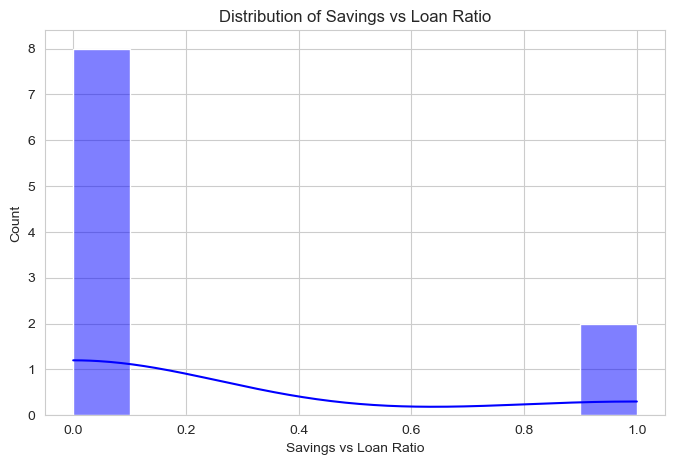

In [128]:
# EDA Visualizations
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df['Savings_vs_Loan_Ratio'], bins=10, kde=True, color='blue')
plt.title("Distribution of Savings vs Loan Ratio")
plt.xlabel("Savings vs Loan Ratio")
plt.ylabel("Count")
plt.show()

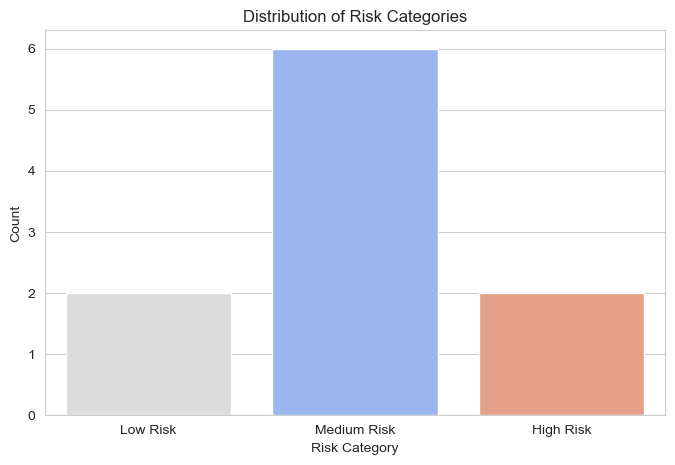

In [138]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Risk_Category', data=df, hue='Risk_Category', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'], legend=False)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

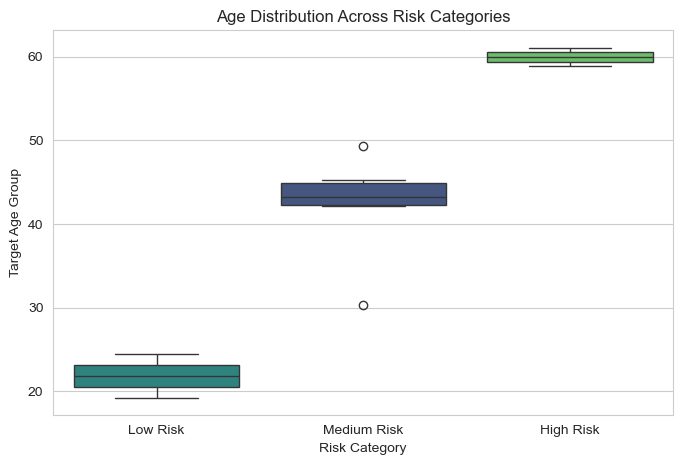

In [136]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk_Category', y='Target_Age_Group', data=df, hue='Risk_Category', palette='viridis', order=['Low Risk', 'Medium Risk', 'High Risk'], legend=False)
plt.title("Age Distribution Across Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Target Age Group")
plt.show()

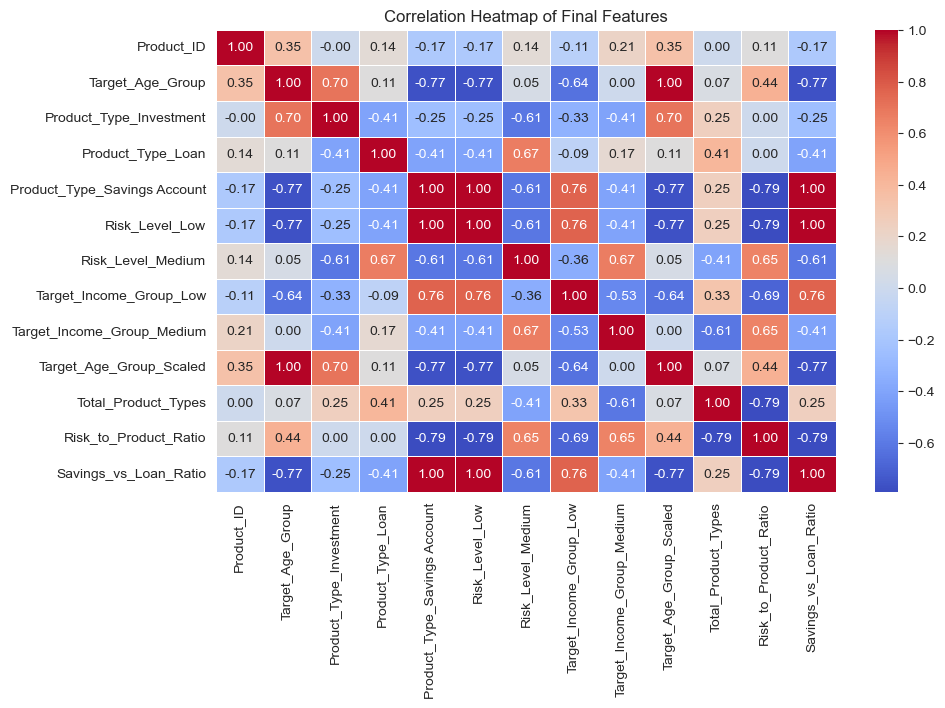

In [134]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Final Features")
plt.show()